### Generate a dataset of images that contain primitive shapes.
* Shapes : Rectangle, Triangle, Ellipse.
* Each Image contains one randomly selected shape of random position , color , orientation .**bold text**
* Task 1 : Procedural Generation
* Task 2 : OpenCV



* The dataset generated is balanced ,meaning the number of images is equal for each shape. 2500 images total


* Encountered challenges while dataset generation :
  * Shapes generated were not consistent meaning for example an ellipse at first was generated with half of it outside the image bounds which makes it half an ellipse . a similar problem with triangles and rectangles.

* The approach was to update and change the functions of generation to make the shapes more consistent and less distorted to improve the accuracy.

* The idea is that it's a perfect dataset , with no distortions , while in real life , shapes are colluded, confused , and mostly distorted which means that the first dataset generated was logicially more realistic .


### Task 1 : Procedural Generation

In [1]:
# Necessary Imports
import os # Interact with OS
import torch # PyTorch package
import numpy as np # Array manipulation
import matplotlib.pyplot as plt
import torchvision # Load tools for computer vision tasks
import torchvision.transforms.functional as F # Vision Preprocessing Transform Opeartions
# Image : Provides function to Create and Manipulate Images
# ImageDraw : Provides function to draw images
from PIL import Image, ImageDraw
import torchvision.transforms as transforms # Vision Transform Operations
import torch.nn as nn # Pytorch NNs 
import torch.nn.functional as F # Pytorch NN operations, activations, loss ...
import torch.optim as optim #  Optimization algorithms
from torchvision.datasets import ImageFolder # 
from sklearn.metrics import classification_report

In [2]:
# Define a directory to save the generated images
dir = "generated_shapes_dataset"
# Create directory
os.makedirs(dir, exist_ok=True)
# Create Subdirsrepresenting the different shapes
os.makedirs(os.path.join(dir,"rectangle"))
os.makedirs(os.path.join(dir,"triangle"))
os.makedirs(os.path.join(dir,"ellipse"))


# Define size of dataset or number of images to be generated
dataset_size = 2500
image_size = (400,400)

In [3]:
# Define helper functions 
# Function to generate a random rbg color 
def random_color():
  """
  Generates a random values color tuple.
  input : none.
  output : tuple representing a color .
  
  """
  return tuple(torch.randint(0,256,size=(3,),dtype=torch.uint8).tolist())

# Function to generate a random starting point for a shape 

def random_point(bounds):

  """
  Generates random coordinates (x,y) within the bounds for a point.
  input : bounds ( upper height and width ).
  output : tuple of two coordinates.
  """

  return tuple(torch.randint(bound, image_size[0] - bound, size=(1,)).item() for bound in bounds)


# Function to generate a rectangle 

def rectangle(image_size):
  """
  Generates a random size and color rectangle shape.
  input : desired image size.
  output : shape coordinates.
  """
  # Create a tensor of height and width (bounds[0] & bounds[1])
  bounds = torch.randint(image_size[0] // 4, image_size[0] // 2, size=(2,))
  
  # Generate random start point of shape
  pt1 = random_point(bounds)
  # Calculate coordinates of second 
  pt2 = random_point(bounds)
  # Generate random color for shape
  color = random_color()
  return pt1, pt2, color, "rectangle"



# Function to generate a triangle

def triangle(image_size):
  """
  Generates a random size and color triangle shape
  input : desired image size
  output : shape coordinates
  """
  #
  bounds = torch.randint(image_size[0] // 4, image_size[0] // 2, size=(2,))
  pt1 = random_point(bounds)
  pt2 = random_point(bounds)
  # 
  pt3 = random_point(bounds)

  color = random_color()
  return pt1, pt2, pt3, color, "triangle"


# Function to generate an ellipse

def ellipse(image_size):
  """
  Generates a random size and color ellipse shape
  input : desired image size
  output : shape coordinates
  """
  #
  bounds = torch.randint(image_size[0] // 4, image_size[0] // 2, size=(2,))
  # Generate a random center for shape
  center = random_point(bounds)
  # 
  axes = random_point(bounds)
  angle = torch.randint(0, 360, size=(1,)).item()
  #
  color = random_color()
  return center, axes, angle, color, "ellipse"




In [4]:
# Generation loop

for i in range(dataset_size):
  # Create a black image on a white background.
  image = Image.new("RGB",image_size,(255,255,255))

  # Choose random shape to be generated 
  shape = torch.randint(1,4,size=(1,)).item() # 1: rectangle, 2: triangle, 3: ellipse

  # Generate rectangle
  if shape == 1:
      pt1, pt2, color, label = rectangle(image_size)
      draw = ImageDraw.Draw(image)
      draw.rectangle((pt1, pt2), fill=color)


  # Generate triangle
  elif shape ==2:
      pt1, pt2, pt3, color, label = triangle(image_size)
      draw = ImageDraw.Draw(image)
      draw.polygon((pt1, pt2, pt3), fill=color)

  # Generate Ellipse
  else:
        center, axes, angle, color, label = ellipse(image_size)
        draw = ImageDraw.Draw(image)
        draw.ellipse(((center[0] - axes[0], center[1] - axes[1]), (center[0] + axes[0], center[1] + axes[1])),
                     fill=color, outline=color)


  # Save the generated image with label

  image_filename = os.path.join(dir,label,f"shape_{i+1}_{label}.png")
 
  # Create path to save the image
  image.save(image_filename)



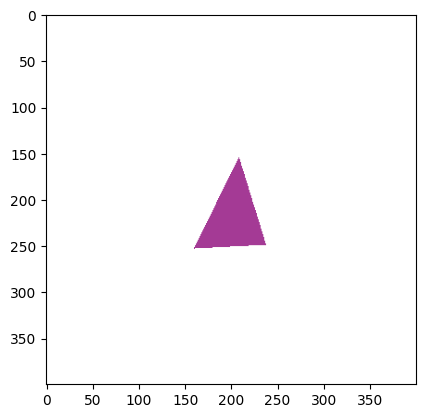

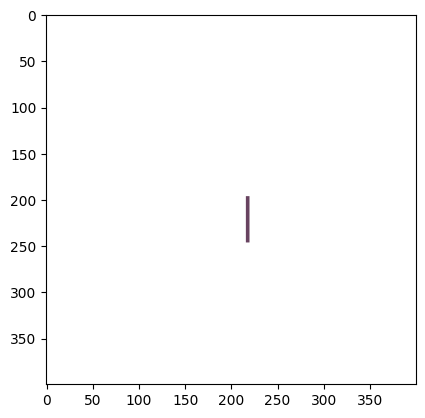

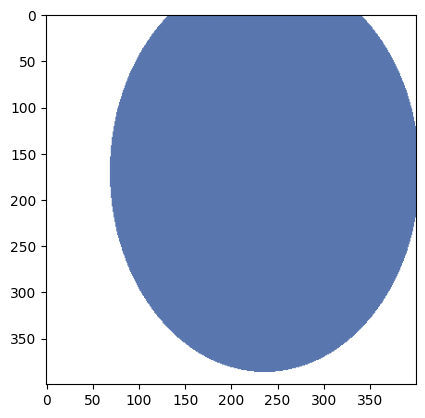

In [5]:
# Visualize Dataset Generated

for subdir, dirs, files in os.walk(dir):
    for filename in files:
        if filename.endswith(".png"):  
            image_path = os.path.join(subdir, filename)
            image = plt.imread(image_path)
            plt.imshow(image)
            plt.show()
        break


 

### Task 2 : Using OpenCV 

In [6]:
import cv2
import numpy as np
import os

# Create directory to store images
if not os.path.exists('OPENCV_primitive_shapes'):
    os.makedirs('OPENCV_primitive_shapes')

os.makedirs('OPENCV_primitive_shapes/' + 'rectangle', exist_ok=True)
os.makedirs('OPENCV_primitive_shapes/' + 'triangle', exist_ok=True)
os.makedirs('OPENCV_primitive_shapes/' + 'ellipse', exist_ok=True)
# Set image size
img_size = (300)

# Define number of images to generate
num_images = 100


# Define list of primitive shapes
shapes = ['rectangle', 'triangle','ellipse' ]

# Loop through and generate images
for i in range(num_images):
    # Create new blank image
    img = np.zeros((img_size, img_size, 3), dtype=np.uint8)
    
    # Select random shape and color
    shape = np.random.choice(shapes)
    color = random_color()
    
    # Draw shape on image
    if shape == 'circle':
        center = (img_size // 2, img_size // 2)
        radius = np.random.randint(50, 100)
        cv2.circle(img, center, radius, color, -1)
    elif shape == 'rectangle':
        pt1 = (np.random.randint(0, img_size // 2), np.random.randint(0, img_size // 2))
        pt2 = (np.random.randint(img_size // 2, img_size), np.random.randint(img_size // 2, img_size))
        cv2.rectangle(img, pt1, pt2, color, -1)
    elif shape == 'triangle':
        pt1 = (np.random.randint(0, img_size), np.random.randint(0, img_size // 2))
        pt2 = (np.random.randint(0, img_size // 2), np.random.randint(img_size // 2, img_size))
        pt3 = (np.random.randint(img_size // 2, img_size), np.random.randint(img_size // 2, img_size))
        pts = np.array([pt1, pt2, pt3], np.int32)
        cv2.fillPoly(img, [pts], color)
    
    # Save image
    cv2.imwrite(f'OPENCV_primitive_shapes/{shape}/{i}.jpg', img)